In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/Shareddrives/機器學習/AOI data") #這邊輸入欲使用的資料夾路徑
os.getcwd()

'/content/drive/Shareddrives/機器學習/AOI data'

In [ ]:
!pip install mahotas

     |████████████████████████████████| 5.7 MB 5.1 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import cv2
import seaborn as sns
import mahotas
import glob
import argparse
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [ ]:
train = pd.read_csv("AOI_train.csv")
train.head()

,ID,Label
0,train_00000.png,0
1,train_00001.png,1
2,train_00002.png,1
3,train_00003.png,5
4,train_00004.png,5


In [ ]:
data_path = "AOI_Train_Image" #路徑掛載到存放圖片的資料夾路徑

image shape: (512, 512, 3)
data type: uint8
min: 77, max: 255


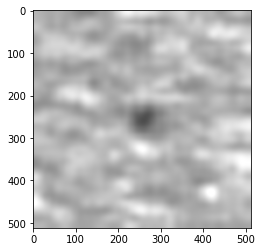

In [ ]:
# 挑選一張切割前的原圖
img = cv2.imread(os.path.join(data_path, train.loc[320, "ID"]))
print(f"image shape: {img.shape}")
print(f"data type: {img.dtype}")
print(f"min: {img.min()}, max: {img.max()}")
plt.imshow(img)
plt.show()

In [ ]:
# 設置切割參數
crop = [ [0,256,0,256], [0,256,256,512], [256,512,0,256], [256,512,256,512] ] # 左上 右上 左下 右下

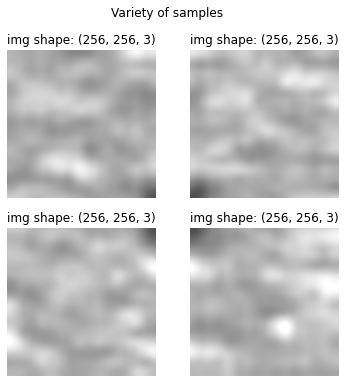

In [ ]:
# 切割成2*2個子圖的效果
plt.figure(figsize=(6, 6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    img = cv2.imread(os.path.join(data_path, train.loc[320, "ID"]))[crop[i][0]:crop[i][1], crop[i][2]:crop[i][3]]
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.title(f"img shape: {img.shape}")
plt.suptitle(f"Variety of samples", fontsize=12)
plt.show()

In [ ]:
import statistics
a=img.reshape(-1)

In [ ]:
# 左上子圖特徵
img = cv2.imread(os.path.join(data_path, train.loc[320,"ID"]))[crop[0][0]:crop[0][1], crop[0][2]:crop[0][3]]
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pd.DataFrame(mahotas.features.haralick(image))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.005379,0.733150,0.999144,428.011590,0.723333,353.230545,1711.313209,7.315201,8.108048,0.001745,1.305335,-0.719189,0.999944
1,0.003127,2.231157,0.997379,425.700269,0.531043,353.248181,1700.569917,7.319398,8.879774,0.001226,1.884022,-0.596598,0.999737
2,0.003539,1.868949,0.997809,426.427355,0.570760,353.222411,1703.840469,7.317222,8.749585,0.001270,1.805693,-0.617386,0.999798
3,0.002960,2.635248,0.996905,425.660884,0.509925,353.250888,1700.008289,7.320368,8.983561,0.001146,1.988092,-0.580185,0.999676


In [ ]:
# 右上子圖特徵
img = cv2.imread(os.path.join(data_path, train.loc[320,"ID"]))[crop[1][0]:crop[1][1], crop[1][2]:crop[1][3]]
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pd.DataFrame(mahotas.features.haralick(image))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.005340,0.776425,0.999085,424.392915,0.712799,365.298330,1696.795236,7.290468,8.123009,0.001792,1.329625,-0.710769,0.999936
1,0.003058,2.475463,0.997068,422.188445,0.521404,365.323537,1686.278315,7.291514,8.937140,0.001217,1.956651,-0.581023,0.999669
2,0.003294,2.092662,0.997531,423.842355,0.554455,365.310861,1693.276757,7.294494,8.824279,0.001272,1.871360,-0.599412,0.999738
3,0.002751,2.923137,0.996539,422.242592,0.492268,365.320584,1686.047229,7.292526,9.059311,0.001120,2.057518,-0.561627,0.999577


In [ ]:
# 左下子圖特徵
img = cv2.imread(os.path.join(data_path, train.loc[320,"ID"]))[crop[2][0]:crop[2][1], crop[2][2]:crop[2][3]]
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pd.DataFrame(mahotas.features.haralick(image))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.005719,0.937132,0.998733,369.938010,0.698826,367.016973,1478.814908,7.187201,8.115757,0.001592,1.444760,-0.691786,0.999906
1,0.003619,2.076632,0.997186,369.043885,0.557491,367.081753,1474.098907,7.196667,8.719125,0.001208,1.868478,-0.594380,0.999686
2,0.003987,1.789231,0.997602,373.089045,0.585090,367.130316,1490.566949,7.198910,8.602594,0.001295,1.780290,-0.614262,0.999756
3,0.003222,3.037170,0.995886,369.123056,0.507636,367.079800,1473.455054,7.195975,8.928957,0.001060,2.093056,-0.560564,0.999523


In [ ]:
# 右下子圖特徵
img = cv2.imread(os.path.join(data_path, train.loc[320,"ID"]))[crop[3][0]:crop[3][1], crop[3][2]:crop[3][3]]
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pd.DataFrame(mahotas.features.haralick(image))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.004456,0.837822,0.999357,651.324531,0.715849,370.361106,2604.460304,7.595687,8.434228,0.001661,1.380124,-0.724793,0.999966
1,0.002753,2.590388,0.998008,650.083217,0.550427,370.475325,2597.742478,7.599402,9.193869,0.001128,2.004676,-0.609814,0.999843
2,0.002939,2.141054,0.998362,653.380450,0.577292,370.550858,2611.380747,7.602799,9.088030,0.001209,1.898578,-0.626314,0.999874
3,0.002464,3.023775,0.997674,650.001342,0.518756,370.477739,2596.981592,7.602775,9.326120,0.001080,2.087023,-0.589809,0.999795


In [ ]:
# 將2*2個子圖的特徵合併成一個dataframe（上述四個dataframe合併）
df_hara = pd.DataFrame()
for i in range(4):
  img = cv2.imread(os.path.join(data_path, train.loc[320,"ID"]))[crop[i][0]:crop[i][1], crop[i][2]:crop[i][3]]
  image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  df_hara = df_hara.append(list(mahotas.features.haralick(image)))

df_hara

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.005379,0.733150,0.999144,428.011590,0.723333,353.230545,1711.313209,7.315201,8.108048,0.001745,1.305335,-0.719189,0.999944
1,0.003127,2.231157,0.997379,425.700269,0.531043,353.248181,1700.569917,7.319398,8.879774,0.001226,1.884022,-0.596598,0.999737
2,0.003539,1.868949,0.997809,426.427355,0.570760,353.222411,1703.840469,7.317222,8.749585,0.001270,1.805693,-0.617386,0.999798
3,0.002960,2.635248,0.996905,425.660884,0.509925,353.250888,1700.008289,7.320368,8.983561,0.001146,1.988092,-0.580185,0.999676
0,0.005340,0.776425,0.999085,424.392915,0.712799,365.298330,1696.795236,7.290468,8.123009,0.001792,1.329625,-0.710769,0.999936
1,0.003058,2.475463,0.997068,422.188445,0.521404,365.323537,1686.278315,7.291514,8.937140,0.001217,1.956651,-0.581023,0.999669
2,0.003294,2.092662,0.997531,423.842355,0.554455,365.310861,1693.276757,7.294494,8.824279,0.001272,1.871360,-0.599412,0.999738
3,0.002751,2.923137,0.996539,422.242592,0.492268,365.320584,1686.047229,7.292526,9.059311,0.001120,2.057518,-0.561627,0.999577
0,0.005719,0.937132,0.998733,369.938010,0.698826,367.016973,1478.814908,7.187201,8.115757,0.001592,1.444760,-0.691786,0.999906
1,0.003619,2.076632,0.997186,369.043885,0.557491,367.081753,1474.098907,7.196667,8.719125,0.001208,1.868478,-0.594380,0.999686


In [ ]:
# 2*2個子圖合併計算各個特徵的平均m(X0:X12)、變異v(X13:X25)、偏度s(X26:X38)、峰度k(X39:X51)，合併成一個row
# 也就是df_hara的column m,v,s,k
df_mvsk = pd.DataFrame()
df_mvsk = pd.concat([df_mvsk,df_hara.mean(axis = 0).to_frame().T],axis = 1)
df_mvsk = pd.concat([df_mvsk,df_hara.var(axis = 0).to_frame().T],axis = 1)
df_mvsk = pd.concat([df_mvsk,df_hara.skew(axis = 0).to_frame().T],axis = 1)
df_mvsk = pd.concat([df_mvsk,df_hara.kurt(axis = 0).to_frame().T],axis = 1)

df_mvsk

,0,1,2,3,4,5,6,7,8,9,...,3,4,5,6,7,8,9,10,11,12
0,0.003663,2.010587,0.997767,467.778121,0.58296,364.023701,1869.101898,7.351288,8.754587,0.001314,...,-0.569266,-0.730397,-0.69134,-0.569296,-0.697868,-0.587742,-0.240854,-0.638974,-0.55368,-0.638289


In [ ]:
# 計算test圖片的2*2個子圖之特徵之特徵m,v,s,k

df_crop22 = pd.DataFrame()

test = [320,321,322]

#for i in range(len(train)):
for j in test:

  # 將2*2個子圖的特徵合併成一個dataframe
  df_hara = pd.DataFrame()
  for i in range(4):
    img = cv2.imread(os.path.join(data_path, train.loc[j,"ID"]))[crop[i][0]:crop[i][1], crop[i][2]:crop[i][3]]
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    df_hara = df_hara.append(list(mahotas.features.haralick(image)))

  # df_hara的column m,v,s,k
  df_mvsk = pd.DataFrame()
  df_mvsk = pd.concat([df_mvsk,df_hara.mean(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.var(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.skew(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.kurt(axis = 0).to_frame().T],axis = 1)

  # 一張照片的13*4個特徵為df_crop22的的一個row
  df_crop22 = pd.concat([df_crop22, df_mvsk])

df_crop22

,0,1,2,3,4,5,6,7,8,9,...,3,4,5,6,7,8,9,10,11,12
0,0.003663,2.010587,0.997767,467.778121,0.582960,364.023701,1869.101898,7.351288,8.754587,0.001314,...,-0.569266,-0.730397,-0.691340,-0.569296,-0.697868,-0.587742,-0.240854,-0.638974,-0.553680,-0.638289
0,0.002416,25.065372,0.877000,522.264390,0.233046,368.431911,2063.992190,6.532271,9.786273,0.000455,...,-2.304370,-0.226902,-2.069324,-2.304331,-2.246914,-2.125663,-1.590510,-0.799819,-2.134306,-1.528022
0,0.002855,22.135236,0.743536,43.154654,0.231044,317.140032,150.483380,5.653966,8.912089,0.000560,...,-1.225253,-0.982807,-1.224645,-0.034946,-0.058292,-0.879926,-0.894395,-0.964742,-0.931006,-1.074903


In [ ]:
# 計算所有圖片的2*2個子圖之特徵之特徵m,v,s,k

df_crop22 = pd.DataFrame()

for j in range(len(train)):

  # 將2*2個子圖的特徵合併成一個dataframe
  df_hara = pd.DataFrame()
  for i in range(4):
    img = cv2.imread(os.path.join(data_path, train.loc[j,"ID"]))[crop[i][0]:crop[i][1], crop[i][2]:crop[i][3]]
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    df_hara = df_hara.append(list(mahotas.features.haralick(image)))

  # df_hara的column m,v,s,k
  df_mvsk = pd.DataFrame()
  df_mvsk = pd.concat([df_mvsk,df_hara.mean(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.var(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.skew(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.kurt(axis = 0).to_frame().T],axis = 1)

  # 一張照片的13*4個特徵為df_crop22的的一個row
  df_crop22 = pd.concat([df_crop22, df_mvsk])

df_crop22

,0,1,2,3,4,5,6,7,8,9,...,3,4,5,6,7,8,9,10,11,12
0,0.000241,714.216741,0.055358,378.149555,0.048021,346.765891,798.381480,6.833141,12.458111,0.000069,...,-2.033243,0.376015,-1.778319,-0.207194,-0.546604,-1.690895,0.000000,0.050542,-0.347063,-0.417647
0,0.000499,98.804897,0.895935,499.732752,0.134085,358.742382,1900.126110,7.376631,11.544005,0.000222,...,-1.051456,-0.799737,-1.134882,-1.050912,-1.073810,-0.359231,-0.633703,-0.785052,-0.612911,-1.168384
0,0.004109,3.342375,0.994862,346.728179,0.483858,357.825059,1383.570341,6.817616,8.674194,0.001062,...,-1.010856,-2.196568,-1.291374,-1.010865,-2.034714,-0.848975,-1.590110,-2.178138,-1.482731,-0.637906
0,0.002551,4.640427,0.996556,675.360956,0.449430,413.953631,2696.803398,7.556818,9.566358,0.000889,...,-0.923618,-1.699015,-0.837373,-0.919764,-1.012360,-1.741966,-1.247224,-1.486834,-1.573258,-1.638844
0,0.002845,2.707433,0.996536,407.300639,0.518441,407.006177,1626.495122,7.285933,8.961979,0.001125,...,-1.797683,-1.474142,-0.920572,-1.797884,-1.618667,-0.484060,-1.355945,-1.574611,-1.942293,-0.751058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000785,72.392278,0.878688,426.937098,0.149668,350.993335,1635.356113,6.984092,10.964483,0.000267,...,-2.159111,-0.281602,-2.249458,-2.158692,-2.211943,-1.316098,0.380403,-0.485148,-0.511205,-1.017190
0,0.000365,394.472011,0.368781,326.952500,0.066721,332.135254,913.337987,6.759797,11.934162,0.000101,...,-2.038920,-0.526728,-0.911884,-1.801178,-1.024498,-0.198344,0.000000,-0.899604,-0.504874,-1.520294
0,0.000409,72.909041,0.942842,659.000908,0.145409,331.282796,2563.094593,7.671811,11.685330,0.000250,...,-2.231903,-1.535410,-2.081144,-2.220655,-2.165245,-1.004770,-1.713618,-1.972642,-1.451895,-1.127521
0,0.000929,20.005922,0.976237,462.806196,0.251087,326.260659,1831.218861,7.374791,10.491710,0.000483,...,-2.183260,-2.211341,-1.828369,-2.183295,-2.044948,-1.105670,-2.117804,-2.186709,-1.265462,-0.421204


In [ ]:
# column name
col_names = []
for i in range(52):
  col_names.append("X"+str(i))
df_crop22.columns = col_names
df_crop22

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
0,0.000241,714.216741,0.055358,378.149555,0.048021,346.765891,798.381480,6.833141,12.458111,0.000069,...,-2.033243,0.376015,-1.778319,-0.207194,-0.546604,-1.690895,0.000000,0.050542,-0.347063,-0.417647
0,0.000499,98.804897,0.895935,499.732752,0.134085,358.742382,1900.126110,7.376631,11.544005,0.000222,...,-1.051456,-0.799737,-1.134882,-1.050912,-1.073810,-0.359231,-0.633703,-0.785052,-0.612911,-1.168384
0,0.004109,3.342375,0.994862,346.728179,0.483858,357.825059,1383.570341,6.817616,8.674194,0.001062,...,-1.010856,-2.196568,-1.291374,-1.010865,-2.034714,-0.848975,-1.590110,-2.178138,-1.482731,-0.637906
0,0.002551,4.640427,0.996556,675.360956,0.449430,413.953631,2696.803398,7.556818,9.566358,0.000889,...,-0.923618,-1.699015,-0.837373,-0.919764,-1.012360,-1.741966,-1.247224,-1.486834,-1.573258,-1.638844
0,0.002845,2.707433,0.996536,407.300639,0.518441,407.006177,1626.495122,7.285933,8.961979,0.001125,...,-1.797683,-1.474142,-0.920572,-1.797884,-1.618667,-0.484060,-1.355945,-1.574611,-1.942293,-0.751058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000785,72.392278,0.878688,426.937098,0.149668,350.993335,1635.356113,6.984092,10.964483,0.000267,...,-2.159111,-0.281602,-2.249458,-2.158692,-2.211943,-1.316098,0.380403,-0.485148,-0.511205,-1.017190
0,0.000365,394.472011,0.368781,326.952500,0.066721,332.135254,913.337987,6.759797,11.934162,0.000101,...,-2.038920,-0.526728,-0.911884,-1.801178,-1.024498,-0.198344,0.000000,-0.899604,-0.504874,-1.520294
0,0.000409,72.909041,0.942842,659.000908,0.145409,331.282796,2563.094593,7.671811,11.685330,0.000250,...,-2.231903,-1.535410,-2.081144,-2.220655,-2.165245,-1.004770,-1.713618,-1.972642,-1.451895,-1.127521
0,0.000929,20.005922,0.976237,462.806196,0.251087,326.260659,1831.218861,7.374791,10.491710,0.000483,...,-2.183260,-2.211341,-1.828369,-2.183295,-2.044948,-1.105670,-2.117804,-2.186709,-1.265462,-0.421204


In [ ]:
# csv output
df_crop22_output = df_crop22.copy()

df_crop22_output.index = train["Label"].index
df_crop22_output = pd.concat([df_crop22_output,train["Label"]],axis = 1)
df_crop22_output

df_crop22_output.to_csv("/content/drive/Shareddrives/機器學習/第三次討論/crop csv/crop2x2.csv")